# Rare Event Simulation

We will now deal with a problem that is frequently encountered in safety engineering and quality management, namely that the event we wish to analyse the probability is occurring at very low probability, sometimes in the range of $p = \left[10^{-9}\ldots 10^{-6}\right]$. Following the MC-Simulation requirement that $N \gg \frac{1}{p}$ and the popular criterion $N \geq 10^4 \frac{1}{p}$ will put 
$N \in \left[10^{10}, 10^{13}\right] $, a really high number for simulations.

Most of these vast number of simulations however will turn out not to be interesting to the simulation stakeholders, e.g. show the safe braking distance or acceptable parts in a production.

Rare event approaches aim to increase the number of "good" samples in a MC-simulation by increasing either the probability of the rare samples or by replicating "good" instances of the simulation, we will visit both in this section.

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
# We will additionally need the normal distribution from the stats package
from scipy.stats import norm

## A scholarly example

Lets assume we want to estimate the probability of outcomes $x\geq4$ where $x$ is drawn from the standard normal distribution, termed $f$. The probability for this is analytically determined to be $3.17\cdot10^{-5}$.

We will estimate by drawing samples from the original distribution $f$ as well as the modified distribution $\tilde{f}$, which can be moved by modifying $\mu_1$ as well as varied by changing $\sigma_1$.

The relative frequency, multiplied by the correcting factor
$$ L = \frac{\int_x^\infty f(y) dy}{\int_x^\infty \tilde{f}(y) dy},$$
is then an estimator for the probability of an event of the outcome being at least $x$.

Observations
MC:   0.0
IS:   21.0
Estimated Probabilities
MC:   0.0
IS:   2.9234822901708406e-05
True: 3.167124183311986e-05


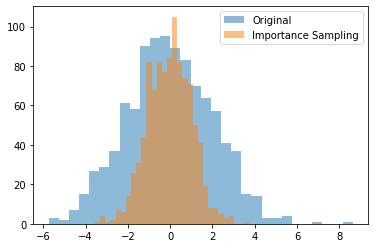

In [3]:
rng = np.random.default_rng()
# Number of MC-samples
N = 1000
# Original distribution
sigma0 = 1
mu0 = 0
# Modified distribution
sigma1 = 2
mu1 = 0
# Critical distance, we look for p(x>distcrit)
distcrit = 4
# Simulate both distributions
X = rng.normal(loc = mu0, scale = sigma0, size = N)
XIS = rng.normal(loc = mu1, scale = sigma1, size = N)
# Linear axis
x = np.linspace(0,distcrit,100)
# Correction factor over the axis
L = norm.sf(x, loc=mu0, scale=sigma0)/norm.sf(x, loc=mu1, scale=sigma1)
# Plotting histograms
plt.hist(XIS, alpha = 0.5, bins = 30, label = 'Original')
plt.hist(X, alpha = 0.5, bins = 30, label = 'Importance Sampling')
plt.legend()
print('Observations')
print('MC:   ' + str(np.sum(1.0*(X>distcrit))))
print('IS:   ' + str(np.sum(1.0*(XIS>distcrit))))
print('Estimated Probabilities')
print('MC:   ' + str(1/N*np.sum(1.0*(X>distcrit))))
print('IS:   ' + str(L[-1]/N*np.sum(1.0*(XIS>distcrit))))
print('True: ' + str(norm.sf(distcrit, loc=mu0, scale=sigma0)))

## Exercise

Repeat the above example with different parameters for

- IS distribution ($\mu$, $\sigma$)
- Number of samples

What do you observe?

## Scholarly example revisited

Since rare event simulation can increase the probability of observing a high number of outcomes, or outcomes at all, it also reduces the variance of the estimators mostly.

Average Observations
MC:   0.021
IS:   159.239
Average Estimated Probabilities
MC:   2.1000000000000002e-05, +/- 0.0002867681990737468
IS:   3.178777098956333e-05, +/- 4.673939931994223e-06
True: 3.167124183311986e-05


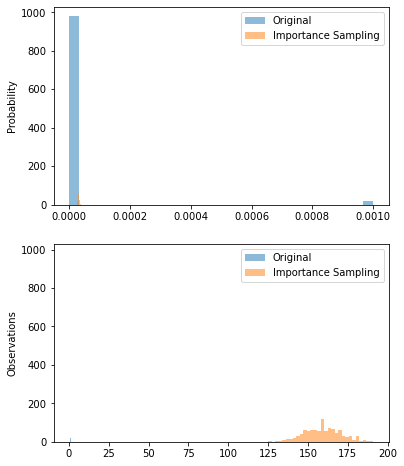

In [4]:
# Number of MC-samples
N = 1000
# Number of MC-samples of MC-samples
M = 1000
# Original distribution
sigma0 = 1
mu0 = 0
# Modified distribution
sigma1 = 4
mu1 = 0
# Critical distance, we look for p(x>distcrit)
distcrit = 4
# Initialise some lists
OL0 = []
OL1 = []
PL0 = []
PL1 = []
# IS Correction factor
L = norm.sf(distcrit, loc=mu0, scale=sigma0)/norm.sf(distcrit, loc=mu1, scale=sigma1)
for i in np.linspace(1,M,M):
    # Simulate both distributions
    X = rng.normal(loc = mu0, scale = sigma0, size = N)
    XIS = rng.normal(loc = mu1, scale = sigma1, size = N)
    OL0.append(np.sum(1.0*(X>distcrit)))
    OL1.append(np.sum(1.0*(XIS>distcrit)))
    PL0.append(1/N*np.sum(1.0*(X>distcrit)))
    PL1.append(L/N*np.sum(1.0*(XIS>distcrit)))


# Plotting histograms
plt.figure(figsize = (6,8))
plt.subplot(211)
plt.ylabel('Probability')
plt.hist(PL0, alpha = 0.5, bins = 30, label = 'Original')
plt.hist(PL1, alpha = 0.5, bins = 30, label = 'Importance Sampling')
plt.legend()
plt.subplot(212)
plt.ylabel('Observations')
plt.hist(OL0, alpha = 0.5, bins = 30, label = 'Original')
plt.hist(OL1, alpha = 0.5, bins = 30, label = 'Importance Sampling')
plt.legend()

print('Average Observations')
print('MC:   ' + str(np.mean(OL0)))
print('IS:   ' + str(np.mean(OL1)))
print('Average Estimated Probabilities')
print('MC:   ' + str(np.mean(PL0)) +', +/- '+ str(2*np.std(PL0)))
print('IS:   ' + str(np.mean(PL1)) +', +/- '+ str(2*np.std(PL1)))
print('True: ' + str(norm.sf(distcrit, loc=mu0, scale=sigma0)))

## Exercise

Repeat the above example with different values for 

- IS distribution ($\mu$, $\sigma$),
- Number of samples and
- critical distance.

What do you observe.

## Braking curves revisited

The braking curves problem that we treated in the previous section is interesting in itself for the full distribution, however we are mostly worried about the rare occasions where a rail vehicle stops behind a danger point. The danger point may be a the (potentially present) end of a train or a switch. According to Deutsche Bahn guidelines, it is standard to place this danger point at least 200 m behind the signal.

This makes the braking distance beyond 1000 m the one to be subjected to critical assessment.

We will now simulate what happens at which probability behind the signal for a 40 wagon train using standard MC-Simulations as well as two importance sampling (IS) approaches:

1. Increase standard deviation of block friction coefficients
1. Move block friction coefficient distribution to lower values

The algorithm operates in this way:

1. Parameter settings
    1. Simulation parameters
    1. Special parameters for rare event sampling (Importance Sampling)
    1. Train parameters
1. Initialisation of lists to collect results
1. For all virtually assembled trains:
    - Calculate train-related parameters (e.g. filling time)
    - Calculate braking distance
    - Store results 
    - Calculate correcting factors acc. to IS
1. Analyse excess of critical braking distance
1. Plot results


In [5]:
############################
# Simulation parameters
# Number of random samples
N = 10000
# Histogram bins
bins = 50 
# Random number generator
rng = np.random.default_rng(42) # Fix for repeatability
# Critical distance range
skrit = np.arange(1100, 1300, 30) 

############################
# Importance sampling parameters
# Wider SD for IS Method 1
k = 2
# Move Gaussian l*sd for Method 2
l = 0.5

############################
# Train parameters
# Initial velocity
v0 = 100/3.6
# Number of wagons
NWagons = 40
# Brake pipe signal propagation velocity
c = 250
# Wagon data (Length/wagon mass min/max)       
minMass = 90000
maxMass = 80000
# Brake cylinder pressure
pmin = 3.7
pmax = 3.9
lengthArray = np.array([10.8, 14.2, 21.0])
# Friction behaviour according to Karwatzki
# ki parameters
k1 = 0.055
k2 = 200
k3 = 50
k4 = 150
k5 = 75
# Force per brake block
Fb = 10
# Average friction coefficient over braking process
muMean = 1/v0/3.6*k1*((Fb + k2)/(Fb+k3))*((k4-k5)*(np.log(3.6*v0 + k5) - np.log(k5)))
muSD = 0.03
#muMin = muMean - muSD
# Brake rigging
etaMin = 0.81
etaMax = 0.9
# Nominal braking force
bfNom = 4.8800000e+05
# Brake mode
tfmax = 30
tfmin = 18

############################
# Initialise lists to collect results
sBrake = []
sBrake1 = []
sBrake2 = []
muBrake = []
muBrake1 = []
muBrake2 = []
Lmu1 = []
Lmu2 = []
pL = []
p1L = []
p2L = []
nL = []
n1L = []
n2L = []

for i in range(0,N-1):
    ##############################
    # Monte Carlo Input Variables
    # Filling time
    tf = rng.uniform(low = tfmin, high = tfmax, size = NWagons)
    # Brake block friction coefficient
    mu = rng.normal(loc = muMean, scale = muSD, size = NWagons)
    ##############################
    # Importance sampling
    # Increased weight on low friction coefficients
    # IS Method 1
    mu1 = rng.normal(loc =  (muMean - l*muSD), 
                     scale = muSD, size = NWagons)
    # IS Method 2
    mu2 = rng.normal(loc = muMean, scale = k*muSD, 
                     size = NWagons)
    # Brake rigging efficiency
    eta = 1/etaMax*rng.uniform(low = etaMin, high = etaMax, 
                               size = NWagons)
    # Brake cylinder pressure, scaled between to 1 for standard
    cp = 1/3.8*rng.uniform(low = pmin, high = pmax, 
                           size = NWagons)
    # Train setup
    # Randomly select from length array and do cumulative sums, 
    # yielding array of distances from loco to wagon
    trainPos = np.cumsum(rng.choice(lengthArray, NWagons))
    # Train mass
    trainMass = rng.uniform(low = minMass, high = maxMass, 
                            size = NWagons)
    #################################
    # Train braking forces acc. to 
    # Standard Monte Carlo
    trainBForce = bfNom * mu * eta * cp
    # IS Method 1
    trainBForce1 = np.ones(NWagons)*bfNom * mu1 * eta * cp
    # IS Method 2
    trainBForce2 = np.ones(NWagons)*bfNom * mu2 * eta * cp 
    #################################
    # Average filling time of train acc. to random individual filling times
    # weighed acc. to individual brake force
    tfAverage = np.mean(trainBForce * (tf + trainPos/c))/np.mean(trainBForce)
    ################################
    # Braking distance acc. to 
    # Standard Monte Carlo
    s = v0**2/(2*sum(trainBForce)/sum(trainMass))+v0*tfAverage/2
    # IS Method 1
    s1 = v0**2/(2*sum(trainBForce1)/sum(trainMass))+v0*tfAverage/2
    # IS Method 2
    s2 = v0**2/(2*sum(trainBForce2)/sum(trainMass))+v0*tfAverage/2
    
    ################################
    # Append to list defined above
    sBrake.append(s)
    sBrake1.append(s1)
    sBrake2.append(s2)
    muBrake.append(np.mean(mu))
    muBrake1.append(np.mean(mu1))
    muBrake2.append(np.mean(mu2))

#################################
# Calculate corrected likelihoods according IS algorithm
mu0 = np.mean(sBrake)
mu1 = np.mean(sBrake1)
mu2 = np.mean(sBrake2)
sigma0 = np.std(sBrake)
sigma1 = np.std(sBrake1)
sigma2 = np.std(sBrake2)
############################
# For all critical distances
for sk in skrit:
    # Correction factor
    L1 = norm.sf(sk, loc=mu0, scale=sigma0)/norm.sf(sk, loc=mu1, scale=sigma1)
    L2 = norm.sf(sk, loc=mu0, scale=sigma0)/norm.sf(sk, loc=mu2, scale=sigma2)
    # Convert lists to arrays
    sBrake = np.array(sBrake)
    sBrake1 = np.array(sBrake1)
    sBrake2 = np.array(sBrake2)
    # Create an indicator array of ones
    Ind = np.ones(sBrake.shape)
    ############################
    # Probability of s > skrit as relative frequency
    # Standard MC
    p = 1/N*np.sum(Ind[sBrake > sk])
    # IS Method 1
    p1 = L1*1/N*np.sum(Ind[sBrake1 > sk])
    # IS Method 2
    p2 = L2*1/N*np.sum(Ind[sBrake2 > sk])
    # Observed occurrences
    n = np.sum(Ind[sBrake > sk])
    n1 = np.sum(Ind[sBrake1 > sk])
    n2 = np.sum(Ind[sBrake2 > sk])
    # Append results to lists
    pL.append(p)
    p1L.append(p1)
    p2L.append(p2)
    nL.append(n)
    n1L.append(n1)
    n2L.append(n2)

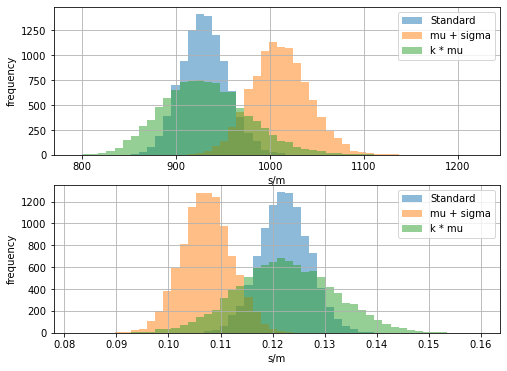

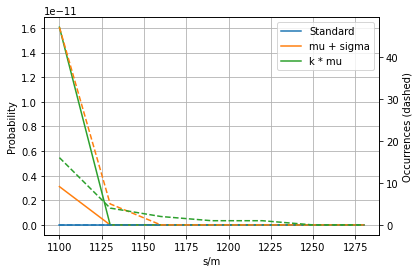

In [6]:
#############################
# Plotting 
############################
# Strings for saving figures
histstring = 'figures/plots/hist.png'
rarestring = 'figures/plots/rare.png'

plt.figure(figsize=(8,6))
plt.subplot(211)
# Histogram range
xmin = np.min([sBrake, sBrake1, sBrake2])
xmax = np.max([sBrake, sBrake1, sBrake2])
plt.hist(sBrake, bins, range = (xmin, xmax), alpha = 0.5, label = 'Standard')
plt.hist(sBrake1, bins, range = (xmin, xmax), alpha = 0.5, label = 'mu + sigma')
plt.hist(sBrake2, bins, range = (xmin, xmax), alpha = 0.5, label = 'k * mu')
plt.xlabel('s/m')
plt.ylabel('frequency')
plt.grid()
plt.legend()
plt.subplot(212)
# Histogram range
xmin = np.min([muBrake, muBrake1, muBrake2])
xmax = np.max([muBrake, muBrake1, muBrake2])
plt.hist(muBrake, bins, range = (xmin, xmax), alpha = 0.5, label = 'Standard')
plt.hist(muBrake1, bins, range = (xmin, xmax), alpha = 0.5, label = 'mu + sigma')
plt.hist(muBrake2, bins, range = (xmin, xmax), alpha = 0.5, label = 'k * mu')
plt.xlabel('s/m')
plt.ylabel('frequency')
plt.grid()
plt.legend()
plt.savefig(histstring)


fig3, ax3 = plt.subplots()
plt.plot(skrit, pL, label = 'Standard')
plt.plot(skrit, p1L, label = 'mu + sigma')
plt.plot(skrit, p2L, label = 'k * mu')
plt.xlabel('s/m')
plt.ylabel('Probability')
ax3.grid()
ax4 = ax3.twinx()
ax4.plot(skrit, nL, linestyle='--')
ax4.plot(skrit, n1L, linestyle='--')
ax4.plot(skrit, n2L, linestyle='--')
ax4.set_ylabel('Occurrences (dashed)')
ax3.legend()
plt.savefig(rarestring)

From the above plots, we easily see that due to the comparably low number of MC-Simulations, the standard MC-Methods does not observe results in the critical distance range, while both IS approaches do. Further, the corrected probabilities indicate that such braking behaviour would occur at low probabilities even for braking under the original conditions.

## Exercise

Vary the braking parameters as well as the IS parameters and the number of MC-samples. What do you observe. Is the system safe?

## Markov Chain Simulation with IS by splitting

While the above examples show a continuous output, discrete states are also freqently the case, especially in the area of reliability. This can be approximated well by Markov Chains, i.e. collections of states and transition probability.

Let us consider an example of a connection with a cold redundancy, exhibting three states:

- $S_0$: Fully operational
- $S_1$: Operational on cold redundancy
- $S_2$: Failure

Luckily, the failure probabilities of the individual levels are rather low. Values for $p_{01}$ and $p_{12}$ define the probability for state transition from $S_0$ to $S_1$ and $S_1$ to $S_2$, respectively.

![](figures/MarkovChain.png)

How likely is it that the system with these parameters fails during a 100h inspection interval?

The IS approach in this case is to clone "successful" chains, i.e. such that progressed to the initial failure states and simulate these with a higher number, the so called offsprings.

As the number of offsprings is known, it is easy to correct the results for the higher frequency of failure.

In the example below, the standard MC as well as the splitting IS approach can be compared in a Monte Carlo simulation.

Splitting:  0.0005064999999999999  +/-  8.539759949787816e-05
Standard:   0.0005361265817386119  +/-  0.00019924415331549634
Variance Reduction:  2.3331352928772535
Offsprings:  8500.0


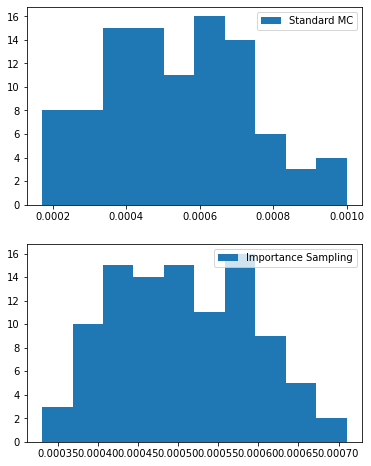

In [7]:
N = 100; # Number of repeated simulations
M = 100; # Number of MC samples (Length of chain)
L = 1e3; # Number of initial Simulations
O = 1e2; # Number of Offsprings

# Transition probability
p01 = 0.001
p12 = 0.0001
# Prepared arrays to save values
I = np.zeros(int(L))
p2 = np.zeros(int(N))
p3 = np.zeros(int(N))
IC = np.zeros(int(O))
pS = np.zeros(int(N))
pN = np.zeros(int(N))
# Repeat the MC example N times
for k in range(0,N):
    # Initial simulations from P0
    for i in range(0,int(L)):
        Ii = np.flatnonzero(rng.uniform(size=N) < p01)
        I[i] = min(Ii.tolist(), default=M+1)
    # Calculate intermediate probability
    R2 = np.sum(1.0*(I < M+1));
    p2[k] = R2/L;
    
    N3 = 0;
    R3 = 0;
    for i in range(0, int(L)):
        if (I[i] < M+1):
            for j in range(0, int(O)):
                # Clone succesful trajectories
                YC = np.flatnonzero(rng.uniform(size=int(M-I[i]+1)) < p12)
                # Check Offsprings for succesful trajectories
                IC[j] = min(YC.tolist(), default=M+1);
            R3 = R3 + sum(1.0*(IC < M+1));
            N3 = N3 + O;
    if (N3 > 0):
        p3[k] = R3/N3;
    else:
        p3[k] = 0;
    nS = 0
    ##############################
    # Standard MC of comparable length
    for m in range(0, int(L+N3)):
        Ii = np.flatnonzero(rng.uniform(size=M) < p01)
        I1 = min(Ii.tolist(), default=M+1)
        Ii = np.flatnonzero(rng.uniform(size=int(M-I1+1)) < p12)
        nS = nS + (min(Ii.tolist(), default=M+1) < M+1)
    pS[k] = p2[k]*p3[k]
    pN[k] = nS/(L+N3)

# Plotting
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.hist(pN, label="Standard MC")
plt.legend()
plt.subplot(212)
plt.hist(pS, label="Importance Sampling")
plt.legend()

print("Splitting: ", np.mean(pS), " +/- ", np.std(pS))
print("Standard:  ", np.mean(pN), " +/- ", np.std(pN))
print("Variance Reduction: ", (np.std(pN)/np.std(pS)))
print("Offsprings: ", (np.mean(N3)))


## Exercise

Try different parameters in the simulation example, e.g. for the number of offsprings or the transition probabilities. What do you observe?

Careful: simulation times may get long!